# Csgo Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import math
import scipy.stats
from scipy.stats import kurtosis, skew
from collections import Counter
from scipy import stats

conn = psycopg2.connect(database="test", user="postgres", password="0000", host="localhost", port="5432")

### Cleaning Data

In [2]:
csgo_profiles = pd.read_sql("SELECT * FROM csgo.profiles", conn)
csgo_profiles.head()

,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation
0,1,s1rc0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,None,NaT,NaN
1,5,rabbitshu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,None,NaT,NaN
2,3,Mochojojo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,None,NaT,NaN
3,206,BoyKot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,7.656120e+16,None,2017-12-09 03:10:27.954734+00:00,NaN
4,382,hazzard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,None,NaT,NaN


In [3]:
print(csgo_profiles.info())
print('Null object :',csgo_profiles.isnull().any().sum())
print('Shape'+str(csgo_profiles.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84393 entries, 0 to 84392
Data columns (total 17 columns):
user_id                 84393 non-null int64
nickname                84393 non-null object
total_kills             75919 non-null float64
total_deaths            75922 non-null float64
total_time_played       75927 non-null float64
total_kills_headshot    75913 non-null float64
total_shots_hit         75923 non-null float64
total_mvps              75820 non-null float64
total_wins              75916 non-null float64
total_rounds_played     75925 non-null float64
total_shots_fired       75925 non-null float64
rank_id                 84393 non-null int64
goal_id                 84393 non-null int64
steam_id                78468 non-null float64
about                   11539 non-null object
updated_at              77405 non-null datetime64[ns, UTC]
compensation            1 non-null float64
dtypes: datetime64[ns, UTC](1), float64(11), int64(3), object(2)
memory usage: 10.9+ MB
None

In [4]:
csgo_profiles = csgo_profiles.dropna(subset=['total_kills','total_deaths','total_time_played','total_rounds_played',
                                             'total_shots_fired'])
csgo_profiles.head()

,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation
5,145,Eugene,1.0,9.0,1216.0,NaN,8.0,NaN,2.0,16.0,11.0,1,1,7.656120e+16,None,2017-12-09 03:10:28.514889+00:00,NaN
8,216,Rz-Baron,47887.0,60368.0,4726211.0,14766.0,148706.0,3122.0,22932.0,45169.0,844161.0,11,1,7.656120e+16,None,2017-12-09 03:10:28.803997+00:00,NaN
10,154,dreamteam.gg,310.0,344.0,9229.0,85.0,1604.0,NaN,28.0,51.0,9192.0,1,3,7.656120e+16,None,2017-12-09 03:10:28.940558+00:00,NaN
11,187,FuN1111,82.0,110.0,10472.0,24.0,335.0,9.0,44.0,80.0,3124.0,1,1,7.656120e+16,None,2017-12-09 03:10:29.118630+00:00,NaN
12,139,VLADIK MORG,2726.0,2635.0,64640.0,608.0,12697.0,9.0,80.0,158.0,64886.0,17,1,7.656120e+16,None,2017-12-09 03:10:29.871780+00:00,NaN


In [5]:
print(csgo_profiles.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75914 entries, 5 to 84392
Data columns (total 17 columns):
user_id                 75914 non-null int64
nickname                75914 non-null object
total_kills             75914 non-null float64
total_deaths            75914 non-null float64
total_time_played       75914 non-null float64
total_kills_headshot    75908 non-null float64
total_shots_hit         75914 non-null float64
total_mvps              75817 non-null float64
total_wins              75908 non-null float64
total_rounds_played     75914 non-null float64
total_shots_fired       75914 non-null float64
rank_id                 75914 non-null int64
goal_id                 75914 non-null int64
steam_id                75905 non-null float64
about                   11151 non-null object
updated_at              75914 non-null datetime64[ns, UTC]
compensation            0 non-null float64
dtypes: datetime64[ns, UTC](1), float64(11), int64(3), object(2)
memory usage: 10.4+ MB
None

In [6]:
csgo_profiles.fillna(0, inplace=True)

In [7]:
csgo_profiles[csgo_profiles['total_deaths']<1]

,user_id,nickname,total_kills,total_deaths,total_time_played,total_kills_headshot,total_shots_hit,total_mvps,total_wins,total_rounds_played,total_shots_fired,rank_id,goal_id,steam_id,about,updated_at,compensation
47239,60640,BlackBullet,10000.0,0.0,0.0,16876.0,0.0,0.0,5000.0,1995364.0,0.0,7,3,0.000000e+00,0,2017-12-13 20:21:50.794736+00:00,0.0
48317,60530,VilaDFeeDPvP,10000.0,0.0,0.0,16876.0,0.0,0.0,5000.0,1995364.0,0.0,7,3,7.656120e+16,0,2017-12-13 20:34:29.982030+00:00,0.0
82074,89965,RS3DY,10000.0,0.0,0.0,250.0,0.0,0.0,5000.0,0.0,0.0,13,3,7.656120e+16,0,2017-12-31 16:26:30.752621+00:00,0.0


In [8]:
csgo_profiles = csgo_profiles[csgo_profiles['total_deaths']!=0]

### Total Kills / Total Deaths

In [9]:
k2 = csgo_profiles['total_kills']
d2 = csgo_profiles['total_deaths']

names = ['Total Kills', 'Total Deaths']
i = [k2, d2]

for names, i in zip(names, i):
       
    print(names)
    print('median: '+ str(np.median(i)))
    print('mean: '+ str(np.mean(i)))
    print('mode: '+ str(stats.mode(i)))
    print('minimum value: '+str(int(min(i))))
    print('maximum value: '+str(int(max(i))))
    print('Standard deviation: '+str(pd.DataFrame.std(i)))
    print('kurtosis: '+str(kurtosis(i)))
    print('Skewness: '+str(skew(i)))
    print('quantile 99% value: '+ str(i.quantile(.99)))
    print('quantile 90% value: '+ str(i.quantile(.90)))
    print('quantile 75% value: '+ str(i.quantile(.75)))
    print('quantile 50% value: '+ str(i.quantile(.50)))
    print('quantile 25% value: '+ str(i.quantile(.25)))
    print('')

Total Kills
median: 23612.0
mean: 237159.7420795405
mode: ModeResult(mode=array([ 10000.]), count=array([18]))
minimum value: 1
maximum value: 2000001586
Standard deviation: 14915483.727095513
kurtosis: 8386.899994967745
Skewness: 86.85292381120257
quantile 99% value: 177973.69999999835
quantile 90% value: 73816.0
quantile 75% value: 45092.0
quantile 50% value: 23612.0
quantile 25% value: 10636.5

Total Deaths
median: 22537.0
mean: 61965.76008747085
mode: ModeResult(mode=array([ 10.]), count=array([12]))
minimum value: 1
maximum value: 2000001186
Standard deviation: 7286742.987684231
kurtosis: 74754.43844198243
Skewness: 272.5013179995185
quantile 99% value: 162704.0
quantile 90% value: 68974.0
quantile 75% value: 42475.0
quantile 50% value: 22537.0
quantile 25% value: 9880.0



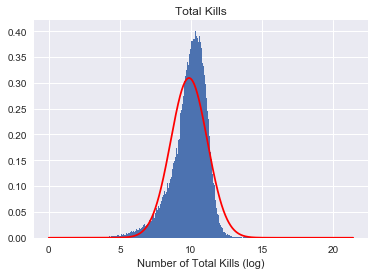

Total Kills(log)
median: 10.0695103364
mean: 9.866978058447732
mode: ModeResult(mode=array([ 9.21034037]), count=array([18]))
minimum value: 0
maximum value: 21
Standard deviation: 1.289587976129693
kurtosis: 4.004578384944234
Skewness: -1.0074616020538152
quantile 75% value: 10.716460126164423
quantile 50% value: 10.06951033636058
quantile 25% value: 9.272046760307287



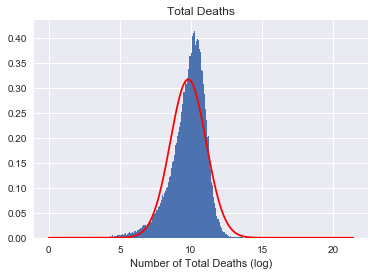

Total Deaths(log)
median: 10.022913682
mean: 9.809351752874031
mode: ModeResult(mode=array([ 2.30258509]), count=array([12]))
minimum value: 0
maximum value: 21
Standard deviation: 1.2593848571254536
kurtosis: 3.085337872875205
Skewness: -1.1813548629633468
quantile 75% value: 10.656670946262992
quantile 50% value: 10.022913682018666
quantile 25% value: 9.198267790741914



In [10]:
k2 = np.log(csgo_profiles['total_kills'])
d2 = np.log(csgo_profiles['total_deaths'])

names = ['Total Kills', 'Total Deaths']
i = [k2, d2]

for names, i in zip(names, i):
    
    sns.set()
 
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Plot histogram
    hist, bin_edges = np.histogram(i, bins='fd')
    plt.hist(i, bins=bin_edges, normed=True)

    # Plot gaussian curve
    mean, std_dev = scipy.stats.norm.fit(i)

    x_axis = np.linspace(min(i), max(i), 10000)
    y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
    plt.plot(x_axis, y_axis, color='red')
    plt.title(names)
    plt.xlabel('Number of '+names+' (log)')
    #plt.ylabel('Number of Players')
    plt.show()
    
    print(names+'(log)')
    print('median: '+ str(np.median(i)))
    print('mean: '+ str(np.mean(i)))
    print('mode: '+ str(stats.mode(i)))
    print('minimum value: '+str(int(min(i))))
    print('maximum value: '+str(int(max(i))))
    print('Standard deviation: '+str(pd.DataFrame.std(i)))
    print('kurtosis: '+str(kurtosis(i)))
    print('Skewness: '+str(skew(i)))
    #print('quantile 99% value: '+ str(i.quantile(.99)))
    #print('quantile 90% value: '+ str(i.quantile(.90)))
    print('quantile 75% value: '+ str(i.quantile(.75)))
    print('quantile 50% value: '+ str(i.quantile(.50)))
    print('quantile 25% value: '+ str(i.quantile(.25)))
    print('')

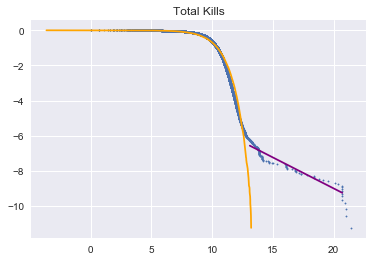

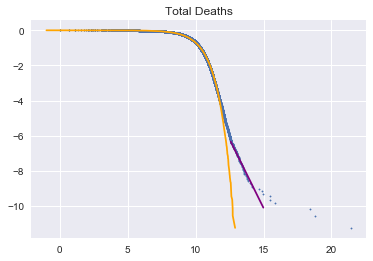

In [44]:
k2 = np.log(csgo_profiles['total_kills'])
d2 = np.log(csgo_profiles['total_deaths'])

names = ['Total Kills', 'Total Deaths']
i = [k2, d2]

for names, i in zip(names, i):
    
    sns.set()    
    
    data_sorted = np.sort(i)

    rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))

    # Setup plot
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Plot points
    plt.scatter(data_sorted, rank, s=2)

    data_sorted = data_sorted[:-20]

    # Plot gaussian
    mean, std_dev = scipy.stats.norm.fit(data_sorted)
    x_axis = np.sort(scipy.stats.norm.rvs(mean, std_dev, len(rank)))

    #plt.plot(x_axis, rank, color='red')

    # Plot gumbell
    mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)
    x_axis = np.sort(scipy.stats.gumbel_l.rvs(mean, std_dev, len(rank)))

    plt.plot(x_axis, rank, color='orange')

    # Plot weibull
    params = scipy.stats.weibull_min.fit(data_sorted)
    x_axis = np.sort(scipy.stats.weibull_min.rvs(params[0], params[1], params[2], len(rank)))

    #plt.plot(x_axis, rank, color='green')

    # Plot tail
    lin_data = np.sort(i)[-145:-6]
    lin_rank = rank[-145:-6]

    slope, intercept = np.polyfit(lin_data, lin_rank, 1)

    line_values = np.array([slope * i + intercept for i in lin_data])
    plt.plot(lin_data, line_values, color='purple')
    plt.title(names)
    plt.show()

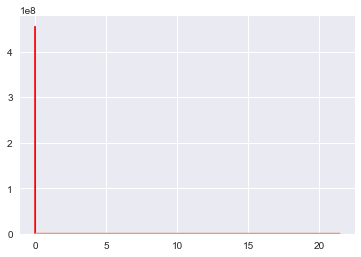

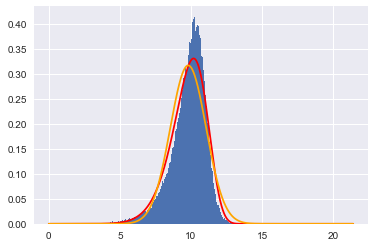

In [45]:
k2 = np.log(csgo_profiles['total_kills'])
d2 = np.log(csgo_profiles['total_deaths'])

names = ['Total Kills', 'Total Deaths']
i = [k2, d2]

for names, i in zip(names, i):
    
    sns.set()    

    data_sorted = i    

    # Setup plot
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Plot histogram
    hist, bin_edges = np.histogram(data_sorted, bins='fd')
    plt.hist(data_sorted, bins=bin_edges, normed=True)

    # Plot gumbel curve
    mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)

    x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
    y_axis = scipy.stats.gumbel_l.pdf(x_axis, mean, std_dev)
    #plt.plot(x_axis, y_axis, color='red')

    # Plot weibull
    params = scipy.stats.weibull_min.fit(data_sorted)

    x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
    y_axis = scipy.stats.weibull_min.pdf(x_axis, params[0], params[1], params[2])
    plt.plot(x_axis, y_axis, color='red')

    # Plot gaussian curve
    mean, std_dev = scipy.stats.norm.fit(data_sorted)

    x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
    y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
    plt.plot(x_axis, y_axis, color='orange')

    plt.show()

In [ ]:
k2 = np.log(csgo_profiles['total_kills'])
data_sorted = np.sort(k2)

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

# Plot histogram
hist, bin_edges = np.histogram(data_sorted, bins='fd')
plt.hist(data_sorted, bins=bin_edges, normed=True)

# Plot gumbel curve
mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.gumbel_l.pdf(x_axis, mean, std_dev)
#plt.plot(x_axis, y_axis, color='red')

# Plot weibull
params = scipy.stats.weibull_min.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.weibull_min.pdf(x_axis, params[0], params[1], params[2])
plt.plot(x_axis, y_axis, color='red')

# Plot gaussian curve
mean, std_dev = scipy.stats.norm.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, y_axis, color='orange')

plt.show()

## Kill-Death ratio

In [34]:
kd_r = csgo_profiles['total_kills'].div(csgo_profiles['total_deaths'] ,axis='index')

In [35]:
kd_r_normal=kd_r[kd_r<=10]

    
names = ['KD ratio (All Data)', 'KD ratio (Exclude abnormal data)']
i = [kd_r, kd_r_normal]
sns.set()
for names, i in zip(names, i):

    print(names)
    print('median: '+ str(np.median(i)))
    print('mean: '+ str(np.mean(i)))
    print('mode: '+ str(stats.mode(i)))
    print('minimum value: '+str(min(i)))
    print('maximum value: '+str(int(max(i))))
    print('Standard deviation: '+str(pd.DataFrame.std(i)))

    print('quantile 99% value: '+ str(i.quantile(.99)))
    print('quantile 95% value: '+ str(i.quantile(.95)))
    print('quantile 75% value: '+ str(i.quantile(.75)))
    print('quantile 50% value: '+ str(i.quantile(.50)))
    print('quantile 25% value: '+ str(i.quantile(.25)))
    print('quantile  1% value: '+ str(i.quantile(.01)))
    print('')

KD ratio (All Data)
median: 1.03885791519
mean: 110.44240150779443
mode: ModeResult(mode=array([ 1.]), count=array([21]))
minimum value: 0.000674763832659
maximum value: 6711410
Standard deviation: 24726.89181744813
quantile 99% value: 3.176619427034933
quantile 95% value: 1.6286540897595145
quantile 75% value: 1.1826274825454859
quantile 50% value: 1.0388579151883763
quantile 25% value: 0.9147104548586347
quantile  1% value: 0.5057112560620116

KD ratio (Exclude abnormal data)
median: 1.03840121517
mean: 1.1029359758360822
mode: ModeResult(mode=array([ 1.]), count=array([21]))
minimum value: 0.000674763832659
maximum value: 10
Standard deviation: 0.4803111717606834
quantile 99% value: 2.761024567535042
quantile 95% value: 1.6112739352254746
quantile 75% value: 1.1811339833167698
quantile 50% value: 1.038401215168728
quantile 25% value: 0.9143300186181446
quantile  1% value: 0.5053560939249335



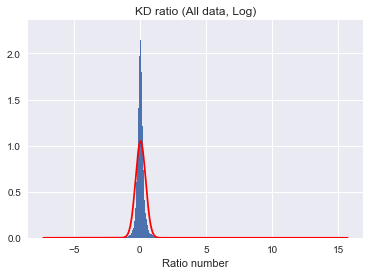

KD ratio (All data, Log)
median: 0.0381219512627
mean: 0.05762630557376429
mode: ModeResult(mode=array([ 0.]), count=array([21]))
minimum value: -7.30114780586
maximum value: 15.719319728
Standard deviation: 0.3802220575634655
kurtosis: 183.15350687773036
Skewness: 7.266486976172327
quantile 75% value: 0.1677386431444139
quantile 50% value: 0.03812195126274459
quantile 25% value: -0.08914770656506567



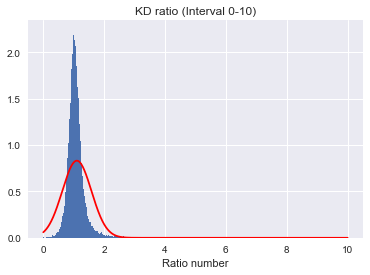

KD ratio (Interval 0-10)
median: 1.03840121517
mean: 1.1029359758360822
mode: ModeResult(mode=array([ 1.]), count=array([21]))
minimum value: 0.000674763832659
maximum value: 10.0
Standard deviation: 0.4803111717606834
kurtosis: 97.98012827572036
Skewness: 7.790913072995873
quantile 75% value: 1.1811339833167698
quantile 50% value: 1.038401215168728
quantile 25% value: 0.9143300186181446



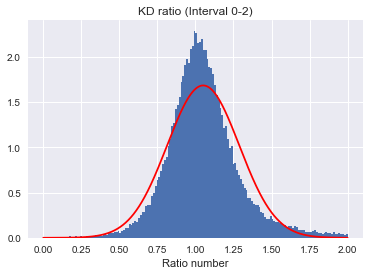

KD ratio (Interval 0-2)
median: 1.03275730396
mean: 1.0509363663079092
mode: ModeResult(mode=array([ 1.]), count=array([21]))
minimum value: 0.000674763832659
maximum value: 2.0
Standard deviation: 0.23706710717323556
kurtosis: 1.8450630543133215
Skewness: 0.553398268874589
quantile 75% value: 1.167795085227498
quantile 50% value: 1.0327573039570022
quantile 25% value: 0.9108159392789373



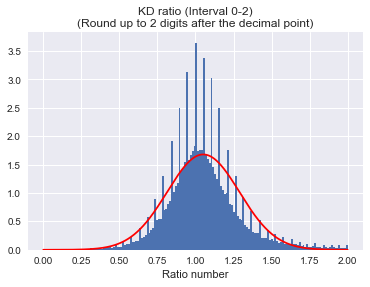

KD ratio (Interval 0-2)
(Round up to 2 digits after the decimal point)
median: 1.03
mean: 1.0511545689293782
mode: ModeResult(mode=array([ 1.]), count=array([1678]))
minimum value: 0.0
maximum value: 2.0
Standard deviation: 0.23751382422302048
kurtosis: 1.8672496341359368
Skewness: 0.5623372766681781
quantile 75% value: 1.17
quantile 50% value: 1.03
quantile 25% value: 0.91



In [42]:
kd_r_log = np.log(kd_r)
kd_r_normal=kd_r[kd_r<=10]
kd_r_normal2=kd_r[kd_r<=2]

kd_r_r1 = round(kd_r, 2)
#kd_r_r1 = kd_r_r1[kd_r_r1<=10]
kd_r_r2 = kd_r_r1[kd_r_r1<=2]

names = ['KD ratio (All data, Log)','KD ratio (Interval 0-10)',
         'KD ratio (Interval 0-2)','KD ratio (Interval 0-2)'+'\n'+'(Round up to 2 digits after the decimal point)']
i = [kd_r_log, kd_r_normal, kd_r_normal2, kd_r_r2]
sns.set()
for names, i in zip(names, i):
    sns.set()
    
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Plot histogram
    hist, bin_edges = np.histogram(i, bins='auto')
    plt.hist(i, bins=bin_edges, normed=True)

    # Plot gaussian curve
    mean, std_dev = scipy.stats.norm.fit(i)

    x_axis = np.linspace(min(i), max(i), 10000)
    y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
    plt.plot(x_axis, y_axis, color='red')
    plt.title(names)
    plt.xlabel('Ratio number')
    #plt.ylabel('Number of Players')
    plt.show()
     
    
    print(names)
    print('median: '+ str(np.median(i)))
    print('mean: '+ str(np.mean(i)))
    print('mode: '+ str(stats.mode(i)))
    print('minimum value: '+str(min(i)))
    print('maximum value: '+str(max(i)))
    print('Standard deviation: '+str(pd.DataFrame.std(i)))
    print('kurtosis: '+str(kurtosis(i)))
    print('Skewness: '+str(skew(i)))
    
    print('quantile 75% value: '+ str(i.quantile(.75)))
    print('quantile 50% value: '+ str(i.quantile(.50)))
    print('quantile 25% value: '+ str(i.quantile(.25)))
    print('')


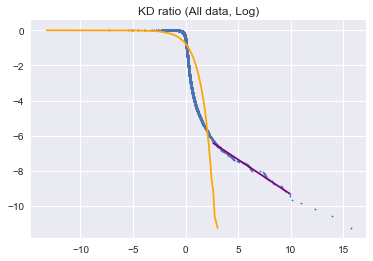

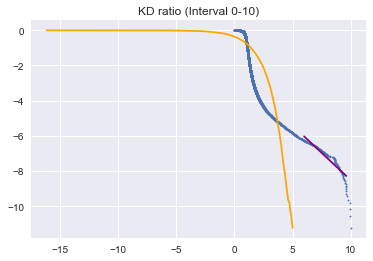

In [43]:
kd_r_log = np.log(kd_r)
kd_r_normal=kd_r[kd_r<=10]
#kd_r_normal2=kd_r[kd_r<=2]

#kd_r_r1 = round(kd_r, 2)
#kd_r_r1 = kd_r_r1[kd_r_r1<=10]
#kd_r_r2 = kd_r_r1[kd_r_r1<=2]

names = ['KD ratio (All data, Log)','KD ratio (Interval 0-10)']
i = [kd_r_log, kd_r_normal]

for names, i in zip(names, i):
    
    sns.set()    
    
    data_sorted = np.sort(i)

    rank = np.log(np.flip(np.arange(1, len(data_sorted) + 1), axis=0) / (len(data_sorted) + 1))

    # Setup plot
    fig = plt.figure(1)
    ax = fig.add_subplot(1, 1, 1)

    # Plot points
    plt.scatter(data_sorted, rank, s=2)

    data_sorted = data_sorted[:-20]

    # Plot gaussian
    mean, std_dev = scipy.stats.norm.fit(data_sorted)
    x_axis = np.sort(scipy.stats.norm.rvs(mean, std_dev, len(rank)))

    #plt.plot(x_axis, rank, color='red')

    # Plot gumbell
    mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)
    x_axis = np.sort(scipy.stats.gumbel_l.rvs(mean, std_dev, len(rank)))

    plt.plot(x_axis, rank, color='orange')

    # Plot weibull
    params = scipy.stats.weibull_min.fit(data_sorted)
    x_axis = np.sort(scipy.stats.weibull_min.rvs(params[0], params[1], params[2], len(rank)))

    #plt.plot(x_axis, rank, color='green')

    # Plot tail
    lin_data = np.sort(i)[-145:-6]
    lin_rank = rank[-145:-6]

    slope, intercept = np.polyfit(lin_data, lin_rank, 1)

    line_values = np.array([slope * i + intercept for i in lin_data])
    plt.plot(lin_data, line_values, color='purple')
    plt.title(names)
    plt.show()

C:\Users\Jimmy\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


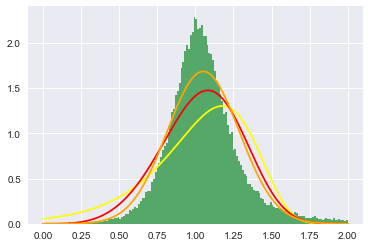

In [59]:
kd_r_log = np.log(kd_r)
kd_r_normal=kd_r[kd_r<=10]
kd_r_normal2=kd_r[kd_r<=2]

sns.set()    

data_sorted = kd_r_normal2    

# Setup plot
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

# Plot histogram
hist, bin_edges = np.histogram(data_sorted, bins='fd')
plt.hist(data_sorted, bins=bin_edges, normed=True)

# Plot gumbel curve
mean, std_dev = scipy.stats.gumbel_l.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.gumbel_l.pdf(x_axis, mean, std_dev)
#plt.plot(x_axis, y_axis, color='yellow')

# Plot weibull
params = scipy.stats.weibull_min.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.weibull_min.pdf(x_axis, params[0], params[1], params[2])
plt.plot(x_axis, y_axis, color='red')

# Plot gaussian curve
mean, std_dev = scipy.stats.norm.fit(data_sorted)

x_axis = np.linspace(min(data_sorted), max(data_sorted), 10000)
y_axis = scipy.stats.norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, y_axis, color='orange')

plt.show()

### Multi fitting testing

In [ ]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "alpha",           #Alpha
    "anglit",          #Anglit
    "arcsine",         #Arcsine
    "beta",            #Beta
    "betaprime",       #Beta Prime
    "bradford",        #Bradford
    "burr",            #Burr
    "cauchy",          #Cauchy
    "chi",             #Chi
    "chi2",            #Chi-squared
    "cosine",          #Cosine
    "dgamma",          #Double Gamma
    "dweibull",        #Double Weibull
    "erlang",          #Erlang
    "expon",           #Exponential
    "exponweib",       #Exponentiated Weibull
    "exponpow",        #Exponential Power
    "fatiguelife",     #Fatigue Life (Birnbaum-Sanders)
    "foldcauchy",      #Folded Cauchy
    "f",               #F (Snecdor F)
    "fisk",            #Fisk
    "foldnorm",        #Folded Normal
    "frechet_r",       #Frechet Right Sided, Extreme Value Type II
    "frechet_l",       #Frechet Left Sided, Weibull_max
    "gamma",           #Gamma
    "gausshyper",      #Gauss Hypergeometric
    "genexpon",        #Generalized Exponential
    "genextreme",      #Generalized Extreme Value
    "gengamma",        #Generalized gamma
    "genlogistic",     #Generalized Logistic
    "genpareto",       #Generalized Pareto
    "genhalflogistic", #Generalized Half Logistic
    "gilbrat",         #Gilbrat
    "gompertz",        #Gompertz (Truncated Gumbel)
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "halfcauchy",      #Half Cauchy
    "halflogistic",    #Half Logistic
    "halfnorm",        #Half Normal
    "hypsecant",       #Hyperbolic Secant
    "invgamma",        #Inverse Gamma
    "invnorm",         #Inverse Normal
    "invweibull",      #Inverse Weibull
    "johnsonsb",       #Johnson SB
    "johnsonsu",       #Johnson SU
    "laplace",         #Laplace
    "logistic",        #Logistic
    "loggamma",        #Log-Gamma
    "loglaplace",      #Log-Laplace (Log Double Exponential)
    "lognorm",         #Log-Normal
    "lomax",           #Lomax (Pareto of the second kind)
    "maxwell",         #Maxwell
    "mielke",          #Mielke's Beta-Kappa
    "nakagami",        #Nakagami
    "ncx2",            #Non-central chi-squared
#    "ncf",             #Non-central F
    "nct",             #Non-central Student's T
    "pareto",          #Pareto
    "powerlaw",        #Power-function
    "powerlognorm",    #Power log normal
    "powernorm",       #Power normal
    "rdist",           #R distribution
    "reciprocal",      #Reciprocal
    "rayleigh",        #Rayleigh
    "rice",            #Rice
    "recipinvgauss",   #Reciprocal Inverse Gaussian
    "semicircular",    #Semicircular
    "t",               #Student's T
    "triang",          #Triangular
    "truncexpon",      #Truncated Exponential
    "truncnorm",       #Truncated Normal
    "tukeylambda",     #Tukey-Lambda
    "uniform",         #Uniform
    "vonmises",        #Von-Mises (Circular)
    "wald",            #Wald
    "weibull_min",     #Minimum Weibull (see Frechet)
    "weibull_max",     #Maximum Weibull (see Frechet)
    "wrapcauchy",      #Wrapped Cauchy
    "ksone",           #Kolmogorov-Smirnov one-sided (no stats)
    "kstwobign"]       #Kolmogorov-Smirnov two-sided test for Large N

In [38]:
cdfs = [
    "norm",            #Normal (Gaussian)
    "expon",           #Exponential
    "extreme1",        #Extreme
    "gumbel",          #Gumbel
    "gumbel_l",        #Left Sided Gumbel, etc.
    "gumbel_r",        #Right Sided Gumbel
    "logistic"]       #Kolmogorov-Smirnov two-sided test for Large N
sample = kd_r_normal2
for cdf in cdfs:
    #fit our data set against every probability distribution
    #parameters = eval("scipy.stats."+cdf+".fit(sample)")

    #Applying the Kolmogorov-Smirnof one sided test
    A2, critical, sig = scipy.stats.anderson(sample, cdf)

    #pretty-print the results
    print(cdf.ljust(16)+("A2: "+str(A2)).ljust(25)+"Significance: "+str(sig)+" Critical V: "+str(critical))

norm            A2: 603.107595941        Significance: [ 15.   10.    5.    2.5   1. ] Critical V: [ 0.576  0.656  0.787  0.918  1.092]
expon           A2: 21244.0010102        Significance: [ 15.   10.    5.    2.5   1. ] Critical V: [ 0.922  1.078  1.341  1.606  1.957]
extreme1        A2: 3466.08724589        Significance: [ 25.   10.    5.    2.5   1. ] Critical V: [ 0.474  0.637  0.756  0.876  1.037]
gumbel          A2: 3466.08724589        Significance: [ 25.   10.    5.    2.5   1. ] Critical V: [ 0.474  0.637  0.756  0.876  1.037]
gumbel_l        A2: 3466.08724589        Significance: [ 25.   10.    5.    2.5   1. ] Critical V: [ 0.474  0.637  0.756  0.876  1.037]
gumbel_r        A2: 1369.29225041        Significance: [ 25.   10.    5.    2.5   1. ] Critical V: [ 0.474  0.637  0.756  0.876  1.037]
logistic        A2: 164.796468015        Significance: [ 25.   10.    5.    2.5   1.    0.5] Critical V: [ 0.426  0.563  0.66   0.769  0.906  1.01 ]
